# Result comparaison for Superpixels Entropy

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from MyDataset import IndianPines, PaviaUniversity, PaviaCenter
from SSGA import SSGA

In [2]:
usedDataset = IndianPines
#usedDataset = PaviaUniversity
#usedDataset = PaviaCenter

N,M,B = usedDataset["shape"]
N,M,B = usedDataset["data"].shape

from EntropyRateSuperpixel import find_superpixel, complete_basic_similarity, plot_img_with_borders, complete_norm_similarity, create_overlay_borders

In [3]:
def find_lambda_coeff(data, K, mini, maxi, similarity_function, Ps):
    def aux(i,j, SP):
        coeff = int((i+j)/2)
        print("finding lambda coeff:", coeff)
        if i>=j:
            return SP, coeff
        SP = find_superpixel(data, K, coeff, similarity_function)
        minSPsize = min([len(l) for l in SP])
        if minSPsize==Ps:
            return SP, coeff
        elif minSPsize<Ps:
            return aux(coeff+1, j, SP)
        else:
            return aux(i, coeff-1, SP)
        
    return aux(mini, maxi, None)


In [4]:
K = 300
print(N,M, B)
print(N*M, K, N*M/K)

gamma = 0.15
Ps = N*M/K * 1/np.log(np.log(N*M/K)) * gamma
print(Ps)
Ps =  int(Ps)

145 145 200
21025 300 70.08333333333333
7.265810077324925


In [5]:
"""
SP, coeff = find_lambda_coeff(usedDataset["data"], K, 1, 1000, complete_basic_similarity, Ps)
print(coeff)
SP1_overlay = create_overlay_borders(usedDataset["data"][:,:,0], SP)
l = [len(l) for l in SP]
l.sort()
print(l)
"""

'\nSP, coeff = find_lambda_coeff(usedDataset["data"], K, 1, 1000, complete_basic_similarity, Ps)\nprint(coeff)\nSP1_overlay = create_overlay_borders(usedDataset["data"][:,:,0], SP)\nl = [len(l) for l in SP]\nl.sort()\nprint(l)\n'

In [6]:
SP2, coeff2 = find_lambda_coeff(usedDataset["data"], K, 10, 500, complete_norm_similarity, Ps)
print(coeff2)
SP2_overlay = create_overlay_borders(usedDataset["data"][:,:,0], SP2)
l = [len(l) for l in SP2]
l.sort()
print(l)

finding lambda coeff: 255
finding lambda coeff: 132
finding lambda coeff: 70
finding lambda coeff: 39
finding lambda coeff: 54
finding lambda coeff: 46
finding lambda coeff: 50
finding lambda coeff: 48
finding lambda coeff: 49
49
[1, 26, 37, 37, 37, 40, 41, 43, 43, 44, 44, 45, 45, 45, 45, 45, 46, 46, 47, 47, 48, 48, 48, 48, 49, 49, 49, 49, 50, 50, 51, 51, 51, 51, 51, 51, 52, 52, 52, 53, 53, 53, 54, 54, 54, 54, 55, 55, 55, 55, 55, 55, 55, 55, 55, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 57, 57, 57, 57, 57, 57, 58, 58, 58, 58, 58, 58, 58, 59, 59, 59, 59, 59, 59, 59, 59, 59, 59, 59, 59, 60, 60, 60, 60, 60, 60, 60, 61, 61, 61, 61, 61, 61, 61, 62, 62, 62, 62, 62, 63, 63, 63, 63, 63, 63, 63, 63, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 65, 65, 65, 65, 65, 65, 65, 65, 66, 66, 66, 66, 66, 66, 67, 67, 67, 67, 67, 67, 67, 67, 67, 68, 68, 68, 68, 68, 69, 69, 69, 69, 70, 70, 70, 70, 70, 71, 71, 72, 72, 72, 72, 73, 73, 73, 73, 73, 74, 74, 74, 74, 75, 75, 75, 75, 75, 75, 75, 75, 75, 76, 76

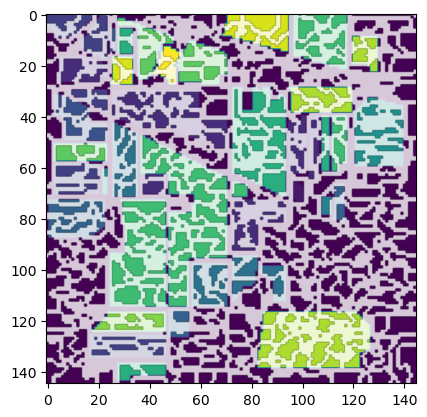

In [7]:
b = np.random.randint(0, B-1)

overlays = [SP2_overlay]
color = [255,255,255,200]
for k in range(len(overlays)):
    for i in range(N):
        for j in range(M):
            if overlays[k][i,j][3] != 0:
                overlays[k][i,j] = color
    
    plt.imshow(usedDataset["gt"])
    plt.imshow(overlays[k])

plt.show()